# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [72]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')

In [73]:
learning_rate = 0.01 
training_steps = 1000

In [74]:
X = np.random.randn(50)
Y = 2*X + np.random.randn(50)

In [75]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)
 

In [76]:
def run_optimization():
    with tf.GradientTape() as tape:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    gradients = tape.gradient(loss, [W, b])        

    optimizer.apply_gradients(zip(gradients, [W,b]))

In [77]:
for step in range(1, training_steps + 1):
    run_optimization()
    
    if step % 50 == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: {:5d}\tloss: {:.4f}\tW: {:.4f}\tb: {:.4f}".format(step, loss, W.numpy(), b.numpy() ))

step:    50	loss: 0.9470	W: 1.6374	b: 0.1282
step:   100	loss: 0.8939	W: 1.7853	b: 0.0701
step:   150	loss: 0.8845	W: 1.8466	b: 0.0440
step:   200	loss: 0.8829	W: 1.8721	b: 0.0324
step:   250	loss: 0.8826	W: 1.8827	b: 0.0274
step:   300	loss: 0.8825	W: 1.8871	b: 0.0252
step:   350	loss: 0.8825	W: 1.8890	b: 0.0243
step:   400	loss: 0.8825	W: 1.8897	b: 0.0238
step:   450	loss: 0.8825	W: 1.8901	b: 0.0237
step:   500	loss: 0.8825	W: 1.8902	b: 0.0236
step:   550	loss: 0.8825	W: 1.8903	b: 0.0236
step:   600	loss: 0.8825	W: 1.8903	b: 0.0236
step:   650	loss: 0.8825	W: 1.8903	b: 0.0236
step:   700	loss: 0.8825	W: 1.8903	b: 0.0235
step:   750	loss: 0.8825	W: 1.8903	b: 0.0235
step:   800	loss: 0.8825	W: 1.8903	b: 0.0235
step:   850	loss: 0.8825	W: 1.8903	b: 0.0235
step:   900	loss: 0.8825	W: 1.8903	b: 0.0235
step:   950	loss: 0.8825	W: 1.8903	b: 0.0235
step:  1000	loss: 0.8825	W: 1.8903	b: 0.0235


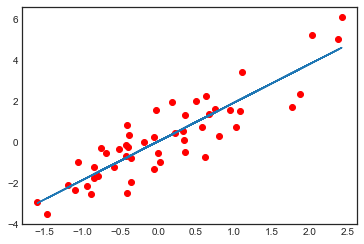

In [78]:
plt.plot(X, Y, 'ro', label='Data')
plt.plot(X, np.array(W*X+b), label='Fitted Line')

## 다항 회귀 (Nonlinear Regression)


### modules import

In [79]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [80]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [81]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [82]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

1.4754443
-0.61573726
-2.1051655


### 데이터 지정

In [83]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

<function matplotlib.pyplot.show(close=None, block=None)>

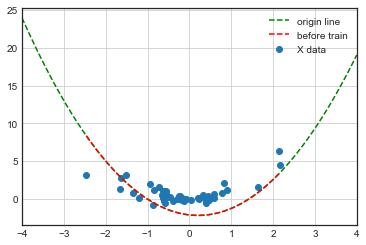

In [84]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='before train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show

### Util Functions

In [85]:
def compute_loss():
    pred_y = a*(np.array(X)**2) + b*np.array(X) + c
    loss = tf.reduce_mean((Y - pred_y)**2)
    return loss 

### Optimizer

In [86]:
optimizer = Adam(learning_rate=learning_rate)

### 학습

In [87]:
for epoch in range(1, epochs+1, 1):
    optimizer.minimize(compute_loss, var_list=[a, b, c])
    
    if epoch % 100 == 0:
        print("epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}".format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:  100	a: 0.8361	b: 0.2986	c: 0.1342
epoch:  200	a: 0.8332	b: 0.3026	c: 0.1430
epoch:  300	a: 0.8331	b: 0.3026	c: 0.1432
epoch:  400	a: 0.8331	b: 0.3026	c: 0.1432
epoch:  500	a: 0.8331	b: 0.3026	c: 0.1432
epoch:  600	a: 0.8331	b: 0.3026	c: 0.1432
epoch:  700	a: 0.8331	b: 0.3026	c: 0.1432
epoch:  800	a: 0.8331	b: 0.3026	c: 0.1432
epoch:  900	a: 0.8331	b: 0.3026	c: 0.1432
epoch: 1000	a: 0.8331	b: 0.3026	c: 0.1432


### 학습 후의 회귀선

<function matplotlib.pyplot.show(close=None, block=None)>

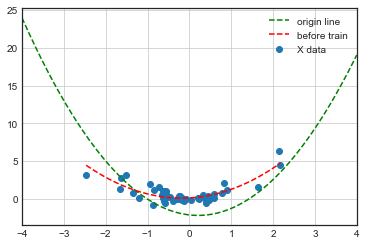

In [88]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='before train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [89]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [91]:
num_classes = 10
num_features = 28 * 28

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [92]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

### tf.data API 사용

In [94]:
from random import triangular


train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [95]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

### Util Functions

In [101]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
    true_y = tf.one_hot(true_y, depth=num_classes)
    pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)
    
    return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [102]:
optimizer = tf.optimizers.SGD(learning_rate)

In [103]:
def run_optimization(x, y):
    with tf.GradientTape() as tape:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
    
    gradients = tape.gradient(loss, [W,b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [104]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % 50 ==0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: {:4d}\tloss: {:.4f}\taccuracy: {:.4f}".format(step, loss, acc))

step:   50	loss: 4.7105	accuracy: 0.3086
step:  100	loss: 3.3079	accuracy: 0.5000
step:  150	loss: 2.7484	accuracy: 0.5352
step:  200	loss: 1.9209	accuracy: 0.6328
step:  250	loss: 1.6120	accuracy: 0.6602
step:  300	loss: 1.3678	accuracy: 0.6875
step:  350	loss: 1.6584	accuracy: 0.6680
step:  400	loss: 1.5825	accuracy: 0.7070
step:  450	loss: 1.4841	accuracy: 0.7109
step:  500	loss: 1.3823	accuracy: 0.7148
step:  550	loss: 1.2219	accuracy: 0.7461
step:  600	loss: 1.1410	accuracy: 0.7656
step:  650	loss: 1.2032	accuracy: 0.7734
step:  700	loss: 1.2209	accuracy: 0.7500
step:  750	loss: 1.2996	accuracy: 0.7539
step:  800	loss: 1.1939	accuracy: 0.7656
step:  850	loss: 0.9267	accuracy: 0.8203
step:  900	loss: 0.9519	accuracy: 0.7617
step:  950	loss: 0.7621	accuracy: 0.8281
step: 1000	loss: 0.9831	accuracy: 0.8203


###  테스트

In [105]:
pred = logistic_regression(x_test)
print("Test Accuracy: {}".format(accuracy(pred, y_test)))

Test Accuracy: 0.8108000159263611


### 시각화

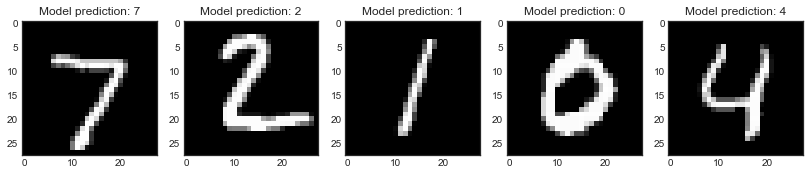

In [108]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(14, 8))
for i in range(1, num_images+1, 1):
    plt.subplot(1, num_images, i)
    plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap='gray')
    plt.title("Model prediction: {}".format(np.argmax(predictions.numpy()[i-1])))
